In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

1. Data Collection and Exploration

In [38]:
df = pd.read_csv('EV_dataset.csv')
print("First 5 rows:")
df.head()

First 5 rows:


,manufacturer,model,type,drive_type,fuel_type,color,battery_kwh,range_km,charging_time_hr,fast_charging,...,city,seats,price_usd,efficiency_score,acceleration_0_100_kmph,top_speed_kmph,warranty_years,cargo_space_liters,safety_rating,target_high_efficiency
0,BYD,Model S,Coupe,FWD,Electric,Blue,84.93,464.06,0.85,True,...,Shanghai,7,32213.0,5.394897,5.84,136.00,3,248.9,3.3,1
1,Lucid,EV6,Sedan,AWD,Electric,Blue,65.14,345.36,2.03,True,...,Tokyo,7,31125.0,5.067074,3.86,149.34,5,504.3,3.6,1
2,Volkswagen,EV6,SUV,FWD,Hybrid,White,22.75,104.25,0.22,True,...,Oslo,5,15674.0,5.057602,2.85,275.80,5,424.9,4.2,1
3,BMW,Ioniq,Sedan,AWD,Hybrid,Black,71.72,341.74,0.48,False,...,Vancouver,2,24044.0,4.826029,3.78,130.41,8,398.5,4.9,0
4,Volkswagen,Model 3,Truck,AWD,Hybrid,Green,62.99,338.16,0.79,True,...,Shenzhen,4,29567.0,5.222624,7.07,253.31,7,411.4,3.4,1


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   manufacturer             250000 non-null  object 
 1   model                    250000 non-null  object 
 2   type                     250000 non-null  object 
 3   drive_type               250000 non-null  object 
 4   fuel_type                250000 non-null  object 
 5   color                    250000 non-null  object 
 6   battery_kwh              250000 non-null  float64
 7   range_km                 250000 non-null  float64
 8   charging_time_hr         250000 non-null  float64
 9   fast_charging            250000 non-null  bool   
 10  release_year             250000 non-null  int64  
 11  country                  250000 non-null  object 
 12  city                     250000 non-null  object 
 13  seats                    250000 non-null  int64  
 14  pric

In [40]:
df.describe()

,battery_kwh,range_km,charging_time_hr,release_year,seats,price_usd,efficiency_score,acceleration_0_100_kmph,top_speed_kmph,warranty_years,cargo_space_liters,safety_rating,target_high_efficiency
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,75.012960,375.115585,1.075374,2018.511452,4.800124,30515.365240,4.999806,6.249837,199.984872,6.598360,449.937046,4.000117,0.499860
std,20.079595,109.948419,0.672221,4.033158,1.721400,7248.361483,0.764292,2.166595,46.225610,2.419298,99.991551,0.578886,0.500001
min,-18.700000,-79.430000,-0.380000,2012.000000,2.000000,-4565.000000,2.194368,2.500000,120.000000,3.000000,-2.700000,3.000000,0.000000
25%,61.470000,299.120000,0.610000,2015.000000,4.000000,25552.750000,4.448975,4.370000,159.920000,5.000000,382.500000,3.500000,0.000000
50%,74.980000,370.360000,0.860000,2019.000000,5.000000,30502.000000,4.999715,6.250000,199.960000,7.000000,450.200000,4.000000,0.000000
75%,88.550000,446.390000,1.330000,2022.000000,6.000000,35483.000000,5.552174,8.130000,239.970000,8.000000,517.300000,4.500000,1.000000
max,159.070000,872.260000,5.430000,2025.000000,7.000000,60045.000000,8.077820,10.000000,280.000000,10.000000,919.400000,5.000000,1.000000


In [41]:
df.describe(include='object')

,manufacturer,model,type,drive_type,fuel_type,color,country,city
count,250000,250000,250000,250000,250000,250000,250000,250000
unique,10,11,6,3,2,8,10,21
top,Chevrolet,i3,Sedan,RWD,Electric,Green,UK,Oslo
freq,25314,22899,41967,83487,125290,31458,25146,25058


In [42]:
numerical_data = [column for column in df.columns if df[column].dtype != 'O']
categorical_data = [column for column in df.columns if df[column].dtype == 'O']
print(numerical_data)
print(categorical_data)

['battery_kwh', 'range_km', 'charging_time_hr', 'fast_charging', 'release_year', 'seats', 'price_usd', 'efficiency_score', 'acceleration_0_100_kmph', 'top_speed_kmph', 'warranty_years', 'cargo_space_liters', 'safety_rating', 'target_high_efficiency']
['manufacturer', 'model', 'type', 'drive_type', 'fuel_type', 'color', 'country', 'city']


2. Data Cleaning and Transformation

In [43]:
df.isnull().sum()
# Now we will see how many rows of the respective columns have null values and handle those values. 

manufacturer               0
model                      0
type                       0
drive_type                 0
fuel_type                  0
color                      0
battery_kwh                0
range_km                   0
charging_time_hr           0
fast_charging              0
release_year               0
country                    0
city                       0
seats                      0
price_usd                  0
efficiency_score           0
acceleration_0_100_kmph    0
top_speed_kmph             0
warranty_years             0
cargo_space_liters         0
safety_rating              0
target_high_efficiency     0
dtype: int64

3. Exploratory Data Analysis (EDA)

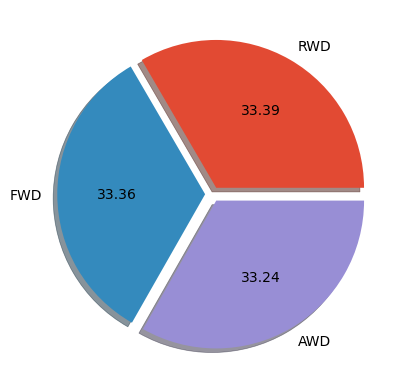

In [44]:
brand_count = df['manufacturer'].value_counts()
drivetrain_count = df['drive_type'].value_counts()
segment_count = df['type'].value_counts()
fuel_type = df['fuel_type'].value_counts()
plt.pie(drivetrain_count, labels = drivetrain_count.index, autopct = "%1.2f", explode = [0.05,0.05,0.05], shadow = True)
plt.show()
#This chart shows us the drivetrain of the EVs. Majority of the EVs have All wheel drive whereas the least cars use rear wheel drive.

In [45]:
df['manufacturer'].value_counts()

manufacturer
Chevrolet     25314
Kia           25143
Hyundai       25084
Tesla         25067
BMW           25054
Volkswagen    24997
Lucid         24946
BYD           24817
Nissan        24789
Ford          24789
Name: count, dtype: int64

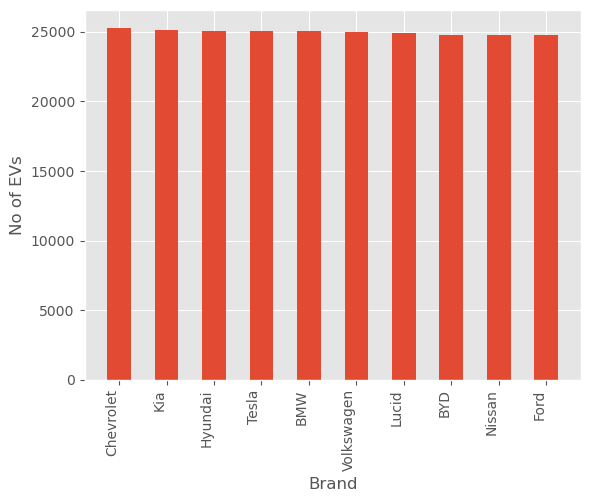

In [46]:
# plt.figure(figsize=(16, 8))  
plt.bar(brand_count.index, brand_count, width = 0.5)
plt.xticks(rotation=90, ha='right')
plt.xlabel('Brand')
plt.ylabel('No of EVs')
plt.show()
# This bar chart shows the number of vehicles produced by individual brands.

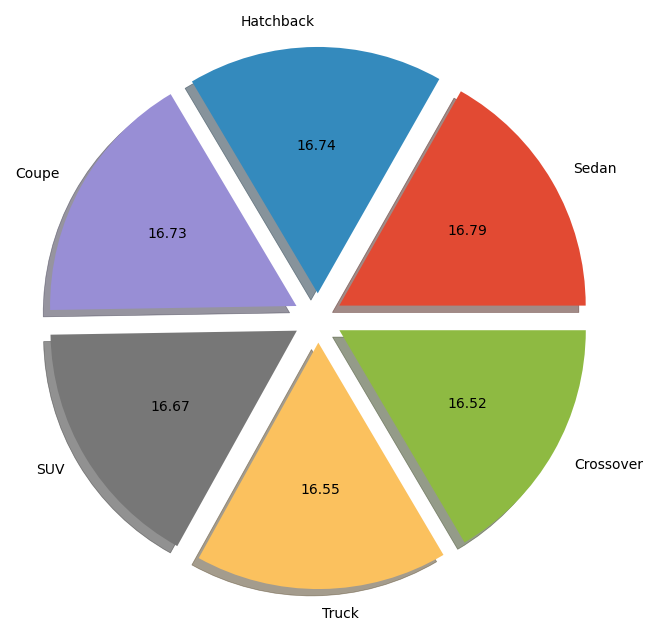

In [47]:
plt.figure(figsize=(8, 8))
plt.pie(segment_count, labels = segment_count.index, autopct = "%1.2f",shadow = True,explode=[0.1,0.1,0.1,0.1,0.1,0.1])
plt.show()

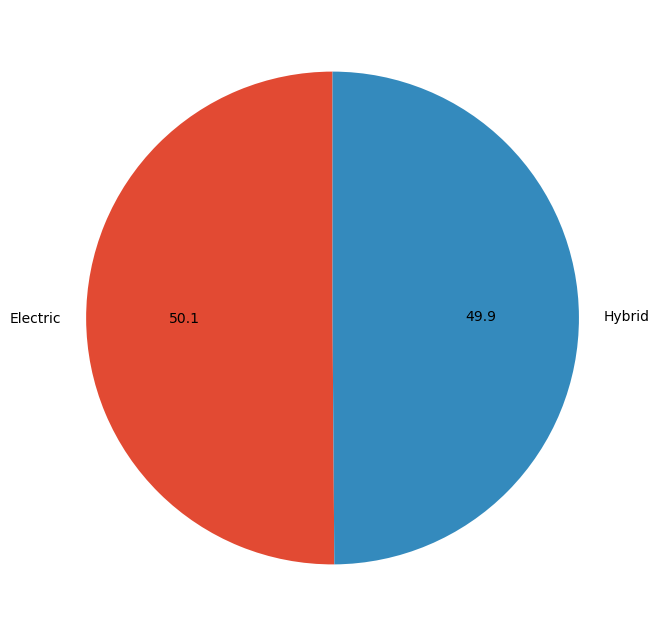

In [48]:
plt.figure(figsize=(8, 8))
plt.pie(fuel_type, labels = fuel_type.index, autopct = "%1.1f",startangle=90)
plt.show()

In [49]:
awd_range = df[df['drive_type'] == 'AWD']['range_km']
rwd_range = df[df['drive_type'] == 'RWD']['range_km']
fwd_range = df[df['drive_type'] == 'FWD']['range_km']

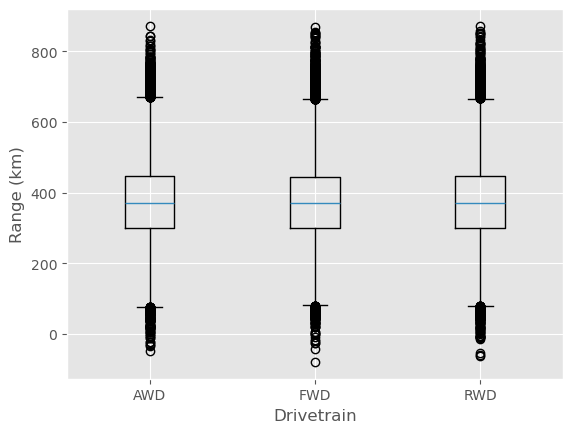

In [50]:
plt.boxplot([awd_range, fwd_range, rwd_range], tick_labels = ['AWD','FWD','RWD'])
plt.xlabel('Drivetrain')
plt.ylabel('Range (km)')
plt.show()
# The box plot below shows the range provided by each of the drivetrains. The average range of AWD and RWD is similar whereas the FWD give much lower range than the rest.

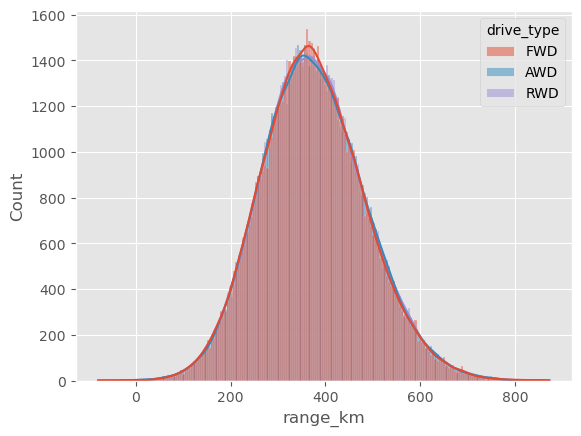

In [51]:
sns.histplot(df,x='range_km',kde=True,hue='drive_type')
plt.show()

In [52]:
new_df = df[numerical_data]
# We will only use the numerical columns for further predictions as the categorical columns have no effect on the range provided by the vehicle.

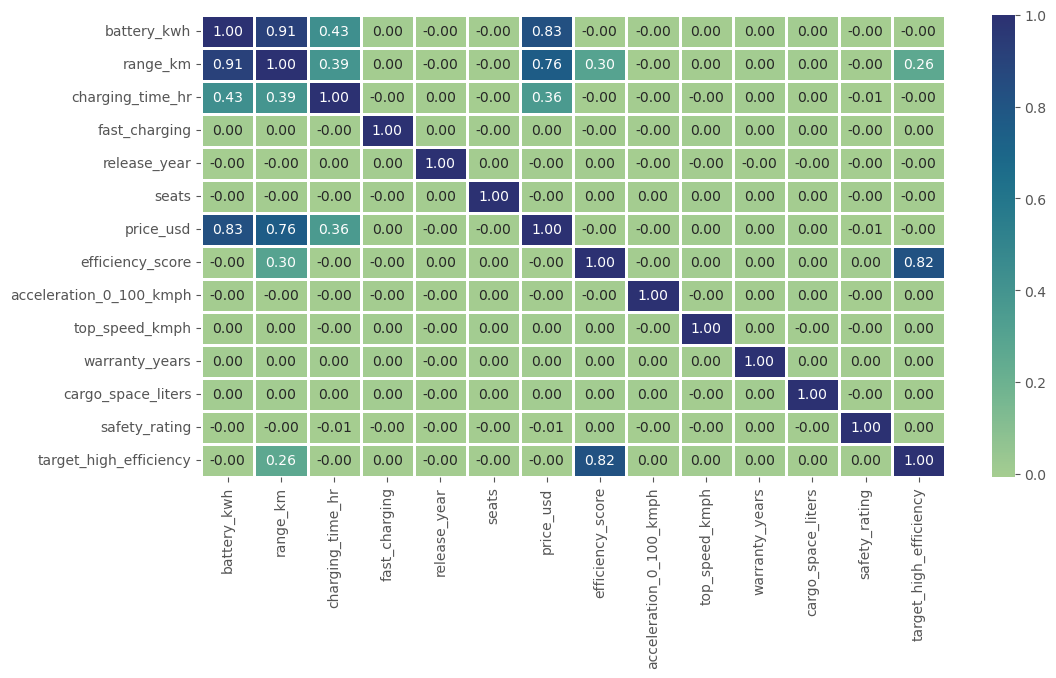

In [53]:
plt.figure(figsize=(12,6))
sns.heatmap(new_df.corr(), annot=True, fmt='.2f',linewidths=2,cmap='crest')
plt.show()

4. Feature Selection

In [54]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   battery_kwh              250000 non-null  float64
 1   range_km                 250000 non-null  float64
 2   charging_time_hr         250000 non-null  float64
 3   fast_charging            250000 non-null  bool   
 4   release_year             250000 non-null  int64  
 5   seats                    250000 non-null  int64  
 6   price_usd                250000 non-null  float64
 7   efficiency_score         250000 non-null  float64
 8   acceleration_0_100_kmph  250000 non-null  float64
 9   top_speed_kmph           250000 non-null  float64
 10  warranty_years           250000 non-null  int64  
 11  cargo_space_liters       250000 non-null  float64
 12  safety_rating            250000 non-null  float64
 13  target_high_efficiency   250000 non-null  int64  
dtypes: b

In [55]:
corr_matrix = new_df.corr()
threshold=0.5
target_corr = corr_matrix['range_km'].abs()
target_corr

battery_kwh                0.912686
range_km                   1.000000
charging_time_hr           0.390851
fast_charging              0.001841
release_year               0.002627
seats                      0.001729
price_usd                  0.757459
efficiency_score           0.296747
acceleration_0_100_kmph    0.002199
top_speed_kmph             0.001885
warranty_years             0.003804
cargo_space_liters         0.002845
safety_rating              0.001515
target_high_efficiency     0.262158
Name: range_km, dtype: float64

In [56]:
high_corr_features = target_corr[target_corr >= threshold].index.to_list()
high_corr_features

['battery_kwh', 'range_km', 'price_usd']

In [57]:
high_corr_features.remove('range_km')
high_corr_features.append('range_km')
final_df = df[high_corr_features]
final_df
# We have completed feature selection for model training. We will be using final_df for training our model.

,battery_kwh,price_usd,range_km
0,84.93,32213.0,464.06
1,65.14,31125.0,345.36
2,22.75,15674.0,104.25
3,71.72,24044.0,341.74
4,62.99,29567.0,338.16
...,...,...,...
249995,74.63,29188.0,419.61
249996,102.25,34595.0,475.16
249997,81.16,29931.0,400.83
249998,67.63,25308.0,289.30


In [58]:
final_df.describe()

,battery_kwh,price_usd,range_km
count,250000.000000,250000.000000,250000.000000
mean,75.012960,30515.365240,375.115585
std,20.079595,7248.361483,109.948419
min,-18.700000,-4565.000000,-79.430000
25%,61.470000,25552.750000,299.120000
50%,74.980000,30502.000000,370.360000
75%,88.550000,35483.000000,446.390000
max,159.070000,60045.000000,872.260000


5. Model Development

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [60]:
X = final_df.drop('range_km',axis=1)
y = final_df['range_km']


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,random_state=45)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((200000, 2), (50000, 2), (200000,), (50000,))

In [62]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
## Create a function to evaluate the model
def evaluate_model(X, true, predicted):
    n = len(true)
    p = X.shape[1]
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    adj_rsquare = 1 - (1 - r2) * (n - 1) / (n - p - 1)    
    return mae, rmse, r2, adj_rsquare
## Beginning of model training
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
    'Elastic Net Regression':ElasticNet(),
    'AdaBoost': AdaBoostRegressor(),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}
model_results = {
    'Model_Name': [],
    'Train_RMSE': [], 'Train_MAE': [], 'Train_R2': [], 'Train_Adj_R2': [],
    'Test_RMSE': [], 'Test_MAE': [], 'Test_R2': [], 'Test_Adj_R2': [],
    'Overfitting_Gap': [] 
}

for i in range(len(list(models))):
    model_name = list(models.keys())[i]
    model = list(models.values())[i]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate the model
    mae_train, rmse_train, r2_train, adj_r2_train = evaluate_model(X_train,y_train, y_train_pred)
    mae_test, rmse_test, r2_test, adj_r2_test = evaluate_model(X_test,y_test, y_test_pred)

    print(f'Model:{model_name}'.center(33))

    print("Model Performance on Training Set")
    print("- Root Mean Squared Error: {:.4f}".format(rmse_train))
    print("- Mean Absolute Error: {:.4f}".format(mae_train))
    print("- R-squared (R²): {:.4f}".format(r2_train))
    print(f"- Adjusted R-squared (R²): {adj_r2_train:.4f}")

    print("-----------------------------------")

    print("Model Performance on Testing Set")
    print("- Root Mean Squared Error: {:.4f}".format(rmse_test))
    print("- Mean Absolute Error: {:.4f}".format(mae_test))
    print("- R-squared (R²): {:.4f}".format(r2_test))
    print(f"- Adjusted R-squared (R²): {adj_r2_test:.4f}")

    print("- Overfitting:",(round(r2_train-r2_test,2)))
    print('='*35)
    print('\n')
    model_results['Model_Name'].append(model_name)
    
    # Training Metrics
    model_results['Train_RMSE'].append(rmse_train)
    model_results['Train_MAE'].append(mae_train)
    model_results['Train_R2'].append(r2_train)
    model_results['Train_Adj_R2'].append(adj_r2_train)    
    
    # Testing Metrics
    model_results['Test_RMSE'].append(rmse_test)
    model_results['Test_MAE'].append(mae_test)
    model_results['Test_R2'].append(r2_test)
    model_results['Test_Adj_R2'].append(adj_r2_test)
    
    model_results['Overfitting_Gap'].append(round(r2_train-r2_test,2))

     Model:Linear Regression     
Model Performance on Training Set
- Root Mean Squared Error: 44.9181
- Mean Absolute Error: 37.5696
- R-squared (R²): 0.8333
- Adjusted R-squared (R²): 0.8333
-----------------------------------
Model Performance on Testing Set
- Root Mean Squared Error: 44.9867
- Mean Absolute Error: 37.6290
- R-squared (R²): 0.8316
- Adjusted R-squared (R²): 0.8316
- Overfitting: 0.0


      Model:Lasso Regression     
Model Performance on Training Set
- Root Mean Squared Error: 44.9296
- Mean Absolute Error: 37.5791
- R-squared (R²): 0.8332
- Adjusted R-squared (R²): 0.8332
-----------------------------------
Model Performance on Testing Set
- Root Mean Squared Error: 44.9922
- Mean Absolute Error: 37.6358
- R-squared (R²): 0.8316
- Adjusted R-squared (R²): 0.8316
- Overfitting: 0.0


      Model:Ridge Regression     
Model Performance on Training Set
- Root Mean Squared Error: 44.9181
- Mean Absolute Error: 37.5696
- R-squared (R²): 0.8333
- Adjusted R-squared (R²)

In [64]:
metrics = pd.DataFrame(model_results)
metrics.sort_values('Test_Adj_R2',ascending=False)
#Here the two best models seem to be Random Forest and Adaboost. Now we will perform hyperparameter tuning for these two models.

,Model_Name,Train_RMSE,Train_MAE,Train_R2,Train_Adj_R2,Test_RMSE,Test_MAE,Test_R2,Test_Adj_R2,Overfitting_Gap
2,Ridge Regression,44.918065,37.569594,0.833334,0.833333,44.986731,37.628945,0.831624,0.831617,0.00
0,Linear Regression,44.918065,37.569593,0.833334,0.833333,44.986742,37.628952,0.831624,0.831617,0.00
1,Lasso Regression,44.929581,37.579098,0.833249,0.833247,44.992226,37.635753,0.831583,0.831576,0.00
4,AdaBoost,45.397492,38.056510,0.829758,0.829756,45.488434,38.155291,0.827847,0.827841,0.00
5,KNN,40.188667,32.614792,0.866583,0.866582,49.312495,40.169207,0.797686,0.797678,0.07
7,Random Forest,18.422428,14.857019,0.971965,0.971965,49.391347,40.195552,0.797039,0.797031,0.17
3,Elastic Net Regression,54.238636,44.418394,0.756991,0.756989,54.028849,44.312102,0.757136,0.757126,-0.00
6,Decision Tree,1.415083,0.049960,0.999835,0.999835,64.080143,50.491362,0.658368,0.658354,0.34


In [65]:
params = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'fit_intercept': [True, False],
    'solver': ['au to', 'svd', 'lsqr' , 'sag', 'saga'],
    'max_iter': [1000, 5000, 10000]
}
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
grid_search = GridSearchCV(estimator=ridge, param_grid=params, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'alpha': 0.1, 'fit_intercept': True, 'max_iter': 1000, 'solver': 'sag'}


In [66]:
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

mae_train, rmse_train, r2_train, adj_r2_train = evaluate_model(X_train,y_train, y_train_pred)
mae_test, rmse_test, r2_test, adj_r2_test = evaluate_model(X_test,y_test, y_test_pred)

print("Model:Ridge Regression".center(32))
print("Model Performance on Training Set")
print("- Root Mean Squared Error: {:.4f}".format(rmse_train))
print("- Mean Absolute Error: {:.4f}".format(mae_train))
print("- R-squared (R²): {:.4f}".format(r2_train))
print(f"- Adjusted R-squared (R²): {adj_r2_train:.4f}")

print("-----------------------------------")

print("Model Performance on Testing Set")
print("- Root Mean Squared Error: {:.4f}".format(rmse_test))
print("- Mean Absolute Error: {:.4f}".format(mae_test))
print("- R-squared (R²): {:.4f}".format(r2_test))
print(f"- Adjusted R-squared (R²): {adj_r2_test:.4f}")

print("- Overfitting:",(round(r2_train-r2_test,2)))
print('='*35)
print('\n')


     Model:Ridge Regression     
Model Performance on Training Set
- Root Mean Squared Error: 44.9181
- Mean Absolute Error: 37.5696
- R-squared (R²): 0.8333
- Adjusted R-squared (R²): 0.8333
-----------------------------------
Model Performance on Testing Set
- Root Mean Squared Error: 44.9867
- Mean Absolute Error: 37.6289
- R-squared (R²): 0.8316
- Adjusted R-squared (R²): 0.8316
- Overfitting: 0.0




In [67]:
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}
linear = LinearRegression()
linear.fit(X_train,y_train)
y_train_linear = linear.predict(X_train)
y_test_linear = linear.predict(X_test)

mae_test, rmse_test, r2_test, adj_r2_test = evaluate_model(X_test,y_test, y_test_linear)

coefficients = dict(zip(X.columns, linear.coef_))
intercept = linear.intercept_

print("Model:Multiple Linear Regression")

print("Model Performance on Testing Set")
print("- Root Mean Squared Error: {:.4f}".format(rmse_test))
print("- Mean Absolute Error: {:.4f}".format(mae_test))
print("- R-squared (R²): {:.4f}".format(r2_test))
print(f"- Adjusted R-squared (R²): {adj_r2_test:.4f}")
print(f"\nIntercept: {intercept:.2f}")
print(f"Coefficients:{coefficients}")

equation = f"Range_km = {intercept:.2f}"
for feature, coef in coefficients.items():
    equation += f" + ({coef:.4f} * {feature})"
print(f"\nFinal Regression Equation:\n{equation}")

Model:Multiple Linear Regression
Model Performance on Testing Set
- Root Mean Squared Error: 44.9867
- Mean Absolute Error: 37.6290
- R-squared (R²): 0.8316
- Adjusted R-squared (R²): 0.8316

Intercept: 375.11
Coefficients:{'battery_kwh': np.float64(100.71790802280391), 'price_usd': np.float64(-0.33456824893760334)}

Final Regression Equation:
Range_km = 375.11 + (100.7179 * battery_kwh) + (-0.3346 * price_usd)


In [68]:
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

mae_train, rmse_train, r2_train, adj_r2_train = evaluate_model(X_train,y_train, y_train_pred)
mae_test, rmse_test, r2_test, adj_r2_test = evaluate_model(X_test,y_test, y_test_pred)

print("Model:Ridge Regression".center(32))
print("Model Performance on Training Set")
print("- Root Mean Squared Error: {:.4f}".format(rmse_train))
print("- Mean Absolute Error: {:.4f}".format(mae_train))
print("- R-squared (R²): {:.4f}".format(r2_train))
print(f"- Adjusted R-squared (R²): {adj_r2_train:.4f}")

print("-----------------------------------")

print("Model Performance on Testing Set")
print("- Root Mean Squared Error: {:.4f}".format(rmse_test))
print("- Mean Absolute Error: {:.4f}".format(mae_test))
print("- R-squared (R²): {:.4f}".format(r2_test))
print(f"- Adjusted R-squared (R²): {adj_r2_test:.4f}")

print("- Overfitting:",(round(r2_train-r2_test,2)))
print('='*35)
print('\n')


     Model:Ridge Regression     
Model Performance on Training Set
- Root Mean Squared Error: 44.9181
- Mean Absolute Error: 37.5696
- R-squared (R²): 0.8333
- Adjusted R-squared (R²): 0.8333
-----------------------------------
Model Performance on Testing Set
- Root Mean Squared Error: 44.9867
- Mean Absolute Error: 37.6289
- R-squared (R²): 0.8316
- Adjusted R-squared (R²): 0.8316
- Overfitting: 0.0




From the above mertics we can see that the performance of Random Forest Regressor has increased. The adjusted R2 score has gone up and overfitting has decreased from 0.09 to 0.07.
Now we will use the Random Forest Regressor for final prediction app. We will export the model as a pkl for further use.


In [69]:
import pickle
best_model = linear
pickle_file = 'linear_regressor.pkl'
scaler_file = 'scaler.pkl'
with open (pickle_file, 'wb') as file:
    pickle.dump(best_model, file)

with open (scaler_file, 'wb') as file:
    pickle.dump(scaler, file)

print(f'Model saved as {pickle_file}')
print(f'Scaler saved as {scaler_file}')

Model saved as linear_regressor.pkl
Scaler saved as scaler.pkl


In [70]:
# new_ev_data = {
#     'battery_kwh':100,
#     'price_usd':25000.0
# }
# new_data_df = pd.DataFrame([new_ev_data])
# new_data_df = scaler.fit_transform(new_data_df)
# #best_model.predict(new_data_df)[0]
# linear.predict(new_data_df)[0]